In [3]:
import pandas as pd

df = pd.read_csv("../data/X-IIoTID dataset.csv")  # or path you have
# 1. Quick look
print(df.shape)
print(df.head())

# 2. Labels
print(df["class1"].value_counts())  # top-level label
print(df["class3"].value_counts())  # if exists

C:\Users\dell\AppData\Local\Temp\ipykernel_30940\2735776679.py:3: DtypeWarning: Columns (1,3,5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/X-IIoTID dataset.csv")  # or path you have


(820834, 68)
         Date   Timestamp         Scr_IP Scr_port        Des_IP Des_port  \
0   9/01/2020  1578540956  192.168.2.199    49278  192.168.2.10       80   
1  13/01/2020  1578871873       10.0.1.5    39769  131.236.3.92       53   
2   9/01/2020  1578522486    172.24.1.80    59050    172.24.1.1       53   
3  27/02/2020  1582757640  192.168.2.196    37966  192.168.2.10     1880   
4  16/12/2019  1576452612    172.24.1.80    38233    172.24.1.1       53   

  Protocol    Service  Duration Scr_bytes  ... OSSEC_alert_level  \
0      tcp       http   0.67369     13437  ...                 5   
1      udp        dns  0.000083        78  ...                 0   
2      udp        dns  0.000132        38  ...                 0   
3      tcp  websocket  9.378481      1121  ...                 0   
4      udp        dns  0.000074         -  ...                 0   

   Login_attempt Succesful_login  File_activity  Process_activity  \
0              0               0              0     

In [10]:
# 3. Feature types & missing values
print(df.dtypes)
print(df.isna().sum().sort_values(ascending=False).head(20))



Date                           object
Timestamp                      object
Scr_IP                         object
Scr_port                       object
Des_IP                         object
                                ...  
read_write_physical.process     int64
is_privileged                   int64
class1                         object
class2                         object
class3                         object
Length: 68, dtype: object
Date               331
Timestamp          297
Avg_tps              0
Avg_ldavg_1          0
Std_wtps             0
Avg_wtps             0
Std_rtps             0
Avg_rtps             0
Std_tps              0
Std_ideal_time       0
Avg_ideal_time       0
Std_iowait_time      0
Avg_iowait_time      0
Std_system_time      0
Avg_system_time      0
Std_nice_time        0
Std_ldavg_1          0
Avg_kbmemused        0
Std_kbmemused        0
Avg_num_Proc/s       0
dtype: int64


In [13]:
# 4. Basic statistics
print(df.describe().T)


                                count      mean       std  min  25%  50%  75%  \
Conn_state                   820834.0  0.851623  0.355474  0.0  1.0  1.0  1.0   
OSSEC_alert                  820834.0  0.051186  0.220377  0.0  0.0  0.0  0.0   
OSSEC_alert_level            820834.0  0.267717  1.178027  0.0  0.0  0.0  0.0   
Login_attempt                820834.0  0.087305  0.282282  0.0  0.0  0.0  0.0   
Succesful_login              820834.0  0.082730  0.275475  0.0  0.0  0.0  0.0   
File_activity                820834.0  0.072650  0.259562  0.0  0.0  0.0  0.0   
Process_activity             820834.0  0.082620  0.275307  0.0  0.0  0.0  0.0   
read_write_physical.process  820834.0  0.355309  0.478607  0.0  0.0  0.0  1.0   
is_privileged                820834.0  0.082456  0.275059  0.0  0.0  0.0  0.0   

                              max  
Conn_state                    1.0  
OSSEC_alert                   1.0  
OSSEC_alert_level            10.0  
Login_attempt                 1.0  
Succesful

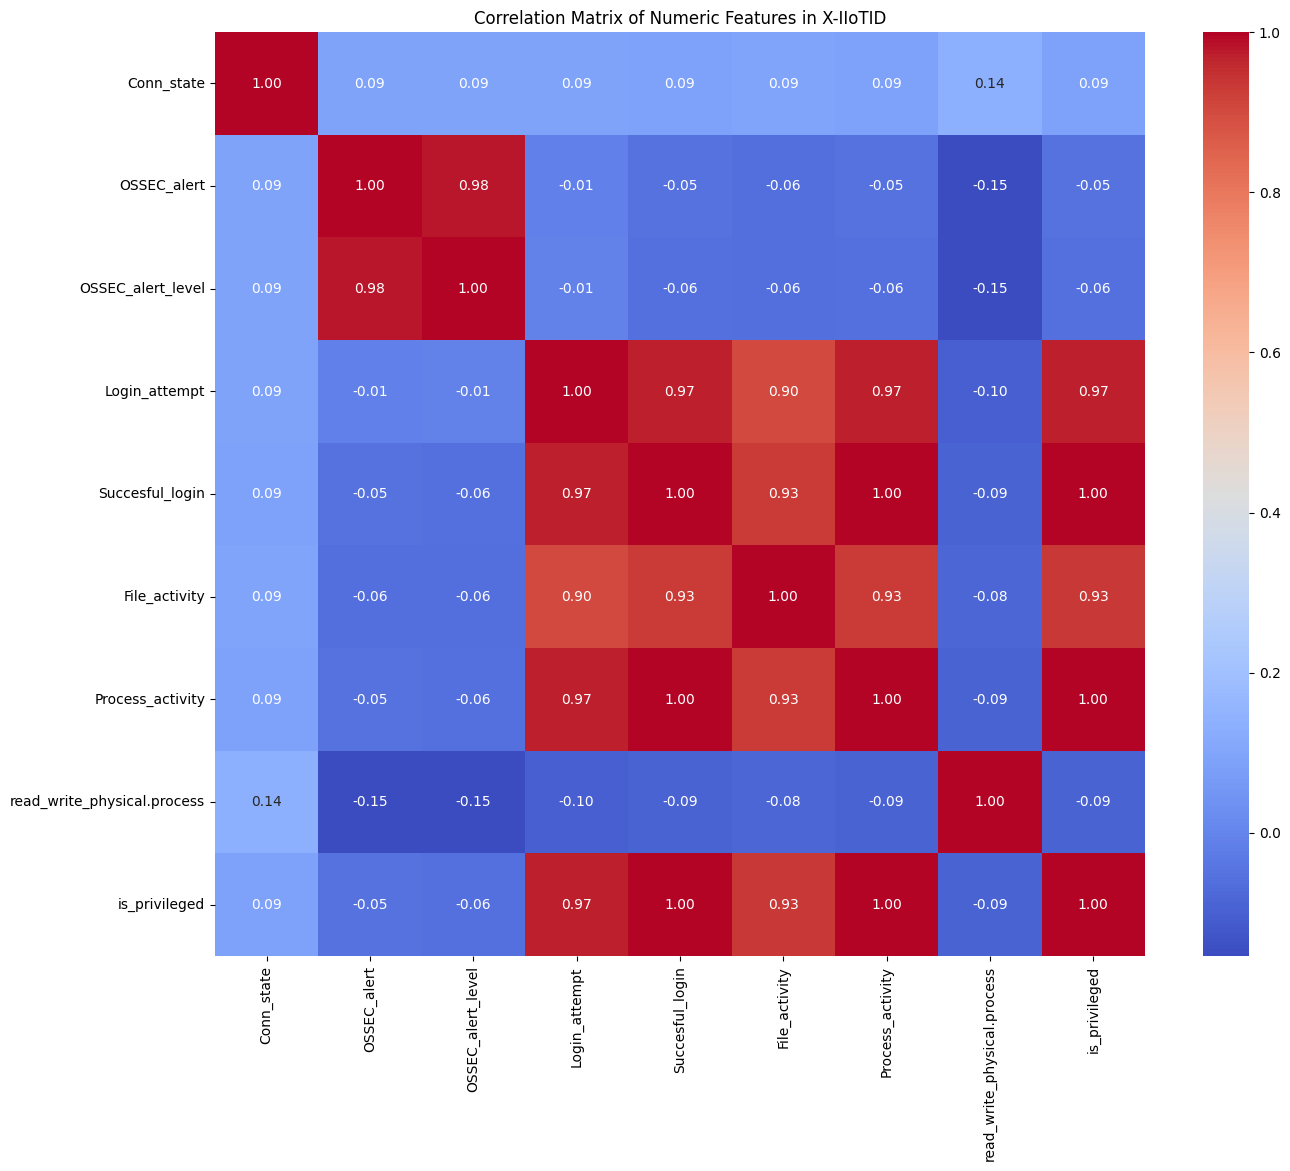

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features in X-IIoTID")
plt.show()

In [6]:
# Display unique Class 2 labels for each Class 1 category
print("Class 2 labels grouped by Class 1:")
print(df.groupby("class1")["class2"].unique())


Class 2 labels grouped by Class 1:
class1
BruteForce                            [Weaponization]
C&C                                             [C&C]
Dictionary                            [Weaponization]
Discovering_resources                [Reconnaissance]
Exfiltration                           [Exfiltration]
Fake_notification                         [Tampering]
False_data_injection                      [Tampering]
Generic_scanning                     [Reconnaissance]
MQTT_cloud_broker_subscription    [Lateral _movement]
MitM                                   [Exploitation]
Modbus_register_reading           [Lateral _movement]
Normal                                       [Normal]
RDOS                                           [RDOS]
Reverse_shell                          [Exploitation]
Scanning_vulnerability               [Reconnaissance]
TCP Relay                         [Lateral _movement]
crypto-ransomware                 [crypto-ransomware]
fuzzing                              [Re

In [7]:
# Display unique Class 3 labels for each Class 2 sublabel
print("\nClass 3 labels grouped by Class 2:")
print(df.groupby("class2")["class3"].unique())


Class 3 labels grouped by Class 2:
class2
C&C                  [Attack]
Exfiltration         [Attack]
Exploitation         [Attack]
Lateral _movement    [Attack]
Normal               [Normal]
RDOS                 [Attack]
Reconnaissance       [Attack]
Tampering            [Attack]
Weaponization        [Attack]
crypto-ransomware    [Attack]
Name: class3, dtype: object


In [10]:
# Display columns and their types
columns_info = pd.DataFrame({"Column Name": df.columns, "Data Type": df.dtypes})

# Force pandas to show all columns and prevent truncation
pd.set_option("display.max_columns", None)  # show all columns
pd.set_option("display.max_rows", None)  # show all rows (optional)
pd.set_option("display.max_colwidth", None)  # don't truncate column content

# Create a concise table of column names and types
columns_info = pd.DataFrame({"Column Name": df.columns, "Data Type": df.dtypes})

columns_info

,Column Name,Data Type
Date,Date,object
Timestamp,Timestamp,object
Scr_IP,Scr_IP,object
Scr_port,Scr_port,object
Des_IP,Des_IP,object
Des_port,Des_port,object
Protocol,Protocol,object
Service,Service,object
Duration,Duration,object
Scr_bytes,Scr_bytes,object
